In [1]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import seaborn as sns
import numpy as np
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from sklearn import metrics
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

In [2]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [3]:
# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded

In [4]:
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    print('File Path : ',filepath)
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [5]:
# load all train
X_train, Y_train = load_dataset_group('train', 'D:/Research Program/UCI_HAR_Dataset/')
# load all test
X_test, Y_test = load_dataset_group('test', 'D:/Research Program/UCI_HAR_Dataset/')

# zero-offset class values
Y_train = Y_train - 1
Y_test = Y_test - 1
# one hot encode y
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print('X_train.shape : ', X_train.shape)
print('Y_train.shape : ', Y_train.shape)
print('X_test.shape : ', X_test.shape)
print('Y_test.shape : ', Y_test.shape)

File Path :  D:/Research Program/UCI_HAR_Dataset/train/Inertial Signals/
File Path :  D:/Research Program/UCI_HAR_Dataset/test/Inertial Signals/
X_train.shape :  (7352, 128, 9)
Y_train.shape :  (7352, 6)
X_test.shape :  (2947, 128, 9)
Y_test.shape :  (2947, 6)


In [6]:
verbose = 1
epochs = 50
batch_size = 20

n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]
n_outputs = Y_train.shape[1]

In [7]:
checkpoint = ModelCheckpoint("har_weights.h5", monitor='val_acc', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [8]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding = 'same'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=epochs, batch_size=batch_size, callbacks = [checkpoint], verbose=verbose)


# evaluate model
(loss, accuracy) = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=verbose)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))


Epoch 1/50
368/368 [==============================] - 4s 10ms/step - loss: 0.3405 - accuracy: 0.8672 - val_loss: 0.3325 - val_accuracy: 0.8738
Epoch 2/50
368/368 [==============================] - 4s 11ms/step - loss: 0.1389 - accuracy: 0.9444 - val_loss: 0.3747 - val_accuracy: 0.8829
Epoch 3/50
368/368 [==============================] - 3s 9ms/step - loss: 0.1109 - accuracy: 0.9547 - val_loss: 0.3446 - val_accuracy: 0.8999
Epoch 4/50
368/368 [==============================] - 3s 9ms/step - loss: 0.1141 - accuracy: 0.9516 - val_loss: 0.3751 - val_accuracy: 0.9016
Epoch 5/50
368/368 [==============================] - 3s 9ms/step - loss: 0.0999 - accuracy: 0.9584 - val_loss: 0.3936 - val_accuracy: 0.8907
Epoch 6/50
368/368 [==============================] - 3s 9ms/step - loss: 0.0987 - accuracy: 0.9581 - val_loss: 0.3763 - val_accuracy: 0.9019
Epoch 7/50
368/368 [==============================] - 3s 9ms/step - loss: 0.0889 - accuracy: 0.9621 - val_loss: 0.4601 - val_accuracy: 0.9033
Epoc

Epoch 28/50
368/368 [==============================] - 3s 8ms/step - loss: 0.0376 - accuracy: 0.9850 - val_loss: 0.8142 - val_accuracy: 0.8785
Epoch 29/50
368/368 [==============================] - 3s 8ms/step - loss: 0.0381 - accuracy: 0.9834 - val_loss: 0.6978 - val_accuracy: 0.9036
Epoch 30/50
368/368 [==============================] - 3s 8ms/step - loss: 0.0495 - accuracy: 0.9814 - val_loss: 0.6295 - val_accuracy: 0.9023
Epoch 31/50
368/368 [==============================] - 3s 8ms/step - loss: 0.0329 - accuracy: 0.9845 - val_loss: 0.5093 - val_accuracy: 0.9226
Epoch 32/50
368/368 [==============================] - 3s 8ms/step - loss: 0.0312 - accuracy: 0.9872 - val_loss: 0.4569 - val_accuracy: 0.9240
Epoch 33/50
368/368 [==============================] - 3s 8ms/step - loss: 0.0315 - accuracy: 0.9871 - val_loss: 0.5450 - val_accuracy: 0.9237
Epoch 34/50
368/368 [==============================] - 3s 9ms/step - loss: 0.0273 - accuracy: 0.9884 - val_loss: 0.5634 - val_accuracy: 0.9233

In [9]:
scores = model.evaluate(X_test, Y_test, batch_size = batch_size, verbose = verbose)
print("HAR - 1D CNN Test Accuracy: %.2f%%" % (scores[1]*100))

148/148 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.9376
HAR - 1D CNN Test Accuracy: 93.76%


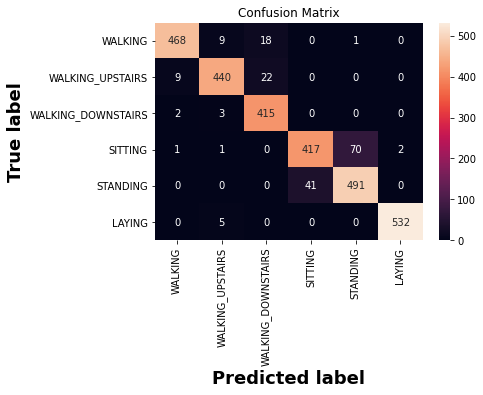

In [17]:

# Print confusion matrix for training data
y_pred_train = model.predict(X_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#print(classification_report(trainy, max_y_pred_train))

# confusion matrix
LABELS = ['WALKING',
          'WALKING_UPSTAIRS',
          'WALKING_DOWNSTAIRS',
          'SITTING',
          'STANDING',
          'LAYING']
y_pred_test = model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(Y_test, axis=1)

matrix = metrics.confusion_matrix(max_y_test, max_y_pred_test)
plt.figure(figsize=(6, 4))
ax=sns.heatmap(matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
#ax= sns.heatmap(matrix,  cbar=False, annot=True, fmt="d")
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Confusion Matrix')
plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.savefig('C:/Users/Dipanwita/OneDrive/Desktop/IEEE Access_CNN_AE_LSTM/images/cnn1d_uci.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

